c:\Users\Matias\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
c:\Users\Matias\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
c:\Users\Matias\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
c:\Users\Matias\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
c:\Users\Matias\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
c:\Users\Matias\anaconda3\lib\site-packages\p

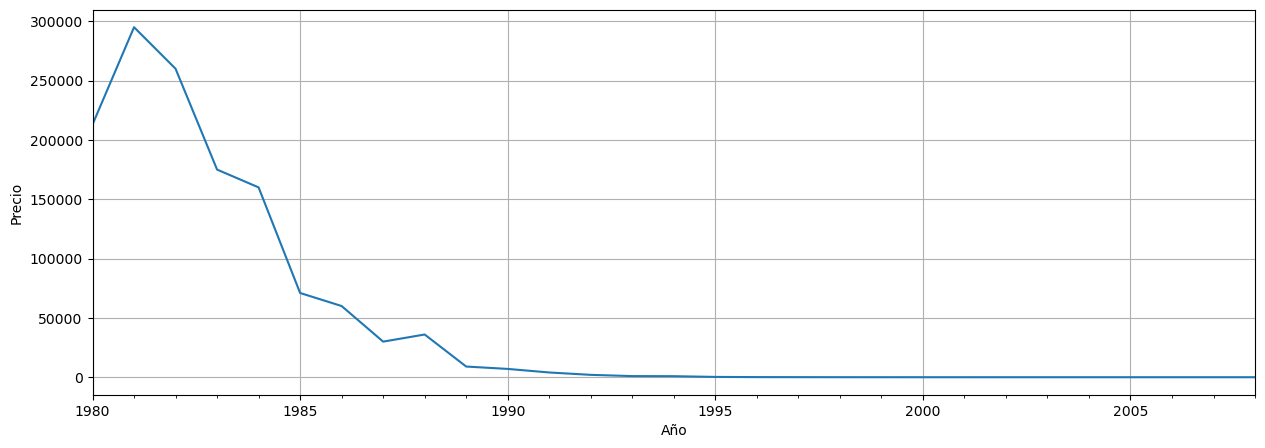

In [1]:
import matplotlib.pyplot as plt
import astsadata as astsa
import numpy as np

plt.rcParams['figure.figsize'] = [15,5]
plt.rcParams['axes.grid'] = True


jj = astsa.cpg
jj.plot(xlabel="Año", ylabel="Precio", legend=False);

1. Describir brevemente la serie observada. Argumentar que la serie presenta aproximadamente un descenso exponencial.

1. Descripción de la Serie Observada
La gráfica muestra el precio de almacenamiento en dólares por gigabyte desde 1980 hasta 2008. La serie presenta una clara tendencia descendente. En los primeros años, el costo de almacenamiento era extremadamente alto, llegando a alrededor de 300,000 dólares por gigabyte. A lo largo de la década de 1980, el precio disminuye rápidamente, y para fines de los 1990s, se estabiliza en valores mucho más bajos, acercándose a cero.

Argumento de Descenso Exponencial
Un descenso exponencial se caracteriza por una disminución rápida al inicio que se va desacelerando a medida que se avanza en el tiempo. Esto parece ser consistente con la serie observada, donde los primeros años muestran una caída abrupta en los costos, mientras que en los años posteriores la reducción es menos pronunciada.

2. Transformar la serie a escala logarítmica y graficar nuevamente. Comentar lo observado.

In [2]:
jj.head()

,value
index,
1980,213000.0
1981,295000.0
1982,260000.0
1983,175000.0
1984,160000.0


In [3]:
# Transformación logarítmica
log_prices = np.log(jj)

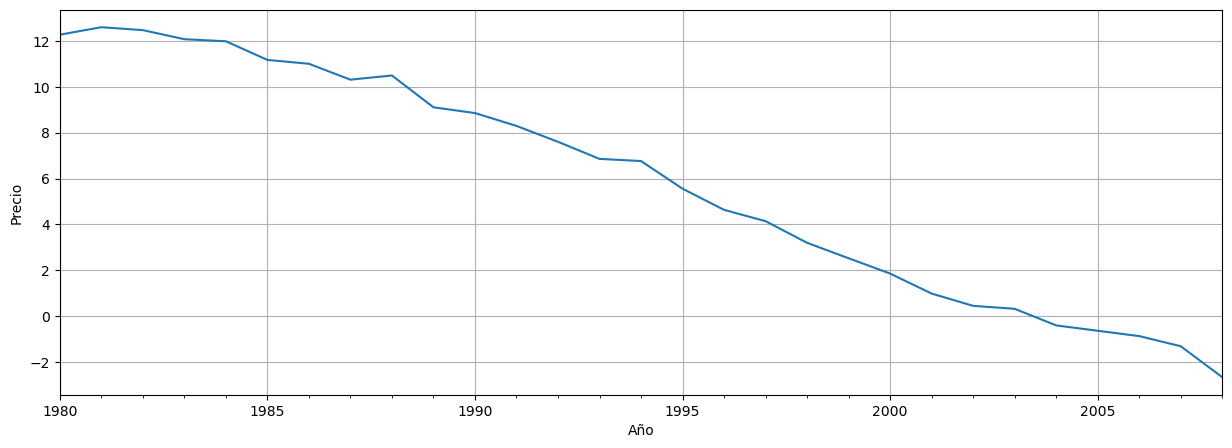

In [4]:
log_prices.plot(xlabel="Año", ylabel="Precio", legend=False);

Explicación:
Transformar la serie a escala logarítmica ayuda a visualizar mejor los datos cuando hay un descenso exponencial. En la gráfica original, los precios descienden rápidamente, y la escala logarítmica permite ver este comportamiento de manera más lineal, facilitando el ajuste de modelos lineales en los pasos posteriores.

3. Realizar una regresión lineal de la forma . 

In [5]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

time = pd.Series([idx.ordinal for idx in log_prices.index], index=log_prices.index)
data_reg = pd.concat([time, log_prices], axis=1)
data_reg.columns = ["time", "precio"]

fit = ols(formula="precio ~ time", data=data_reg).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 precio   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     1790.
Date:                Wed, 03 Jul 2024   Prob (F-statistic):           3.23e-26
Time:                        21:13:21   Log-Likelihood:                -26.396
No. Observations:                  29   AIC:                             56.79
Df Residuals:                      27   BIC:                             59.53
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.8914      0.352     56.587      0.000      19.170      20.613
time          -0.5851      0.014    -42.304      0.000      -0.613      -0.557
==============================================================================
Omnibus:                        4.198   Durbin-Watson:                   0.476
Prob(Omnibus):                  0.123   Jarque-Bera (JB):                2.584
Skew:                          -0.628   Prob(JB):                        0.275
Kurtosis:                       3.749   Cond. No.                         77.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Los resultados de la regresión lineal que has mostrado indican lo siguiente:

Resumen de la Regresión OLS:
Variable Dependiente y R-cuadrado:

Variable Dependiente (Dep. Variable): precio (presumiblemente el precio de algún activo).
R-cuadrado: 0.985
Interpretación: Esto significa que el 98.5% de la variabilidad en el precio (precio) puede ser explicada por la variable time en el modelo de regresión.
Estadísticas de Ajuste del Modelo:

R-cuadrado ajustado: 0.985
Estadístico F: 1790.0
Interpretación: El alto valor del estadístico F y del R-cuadrado ajustado sugieren que el modelo en general es altamente significativo.
Coeficientes:

Intercepto: 19.8914
Interpretación: Cuando time es cero, el precio (precio) estimado es aproximadamente 19.8914 unidades.
time: -0.5851
Interpretación: Por cada unidad de aumento en time, el precio (precio) estimado disminuye en 0.5851 unidades.
Significación Estadística de los Coeficientes:

P>|t| (Valor p): Para ambos coeficientes (intercepto y time), los valores p son muy pequeños (0.000), lo que indica que son estadísticamente significativos.


Otros Tests Estadísticos:

Omnibus: 4.198
Interpretación: Este test verifica la normalidad de los residuos. Un valor p mayor a 0.05 (aquí es 0.123) sugiere que los residuos podrían seguir una distribución normal.
Durbin-Watson: 0.476
Interpretación: Este estadístico detecta autocorrelación en los residuos. Valores cercanos a 2 indican ausencia de autocorrelación, mientras que aquí 0.476 sugiere posible autocorrelación positiva.
Jarque-Bera (JB): 2.584
Interpretación: Otro test de normalidad de los residuos.
Observaciones y Grados de Libertad:

No. Observaciones: 29
Df Residuals: 27
Df Model: 1
Interpretación: Hay 29 observaciones en total, y el modelo tiene 1 grado de libertad asociado a la variable time.
Tipo de Covarianza:

Tipo de Covarianza: no robusta
Interpretación: Indica que los errores estándar no están ajustados para posibles problemas de heterocedasticidad u otras medidas robustas.
Conclusión:
El análisis de regresión sugiere que hay una fuerte relación lineal entre time y el precio (precio), con time teniendo un efecto negativo significativo en el precio estimado. El modelo explica una gran parte de la variabilidad en el precio, aunque la baja estadística Durbin-Watson sugiere que podría haber autocorrelación en los residuos, lo cual debe ser considerado para una interpretación más precisa del modelo.

4. Graficar los valores ajustados y analizar los residuos y el ajuste obtenido.

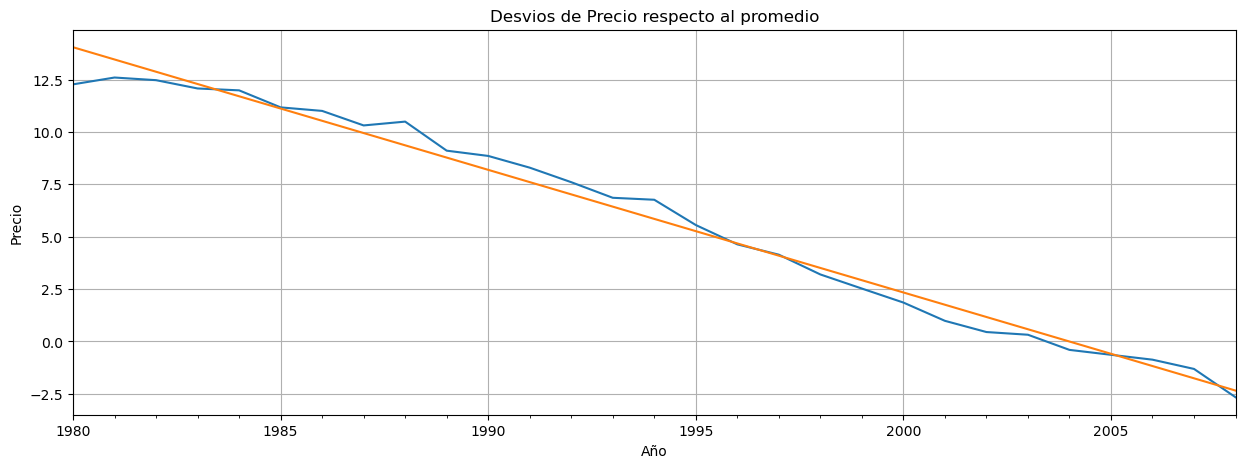

In [6]:
ax = log_prices.plot(xlabel="Time", ylabel="Price deviation", legend=False)
ax.plot(fit.fittedvalues)
plt.title("Desvios de Precio respecto al promedio")
plt.ylabel("Precio")
plt.xlabel("Año");

Text(0.5, 1.0, 'Residuos del ajuste')

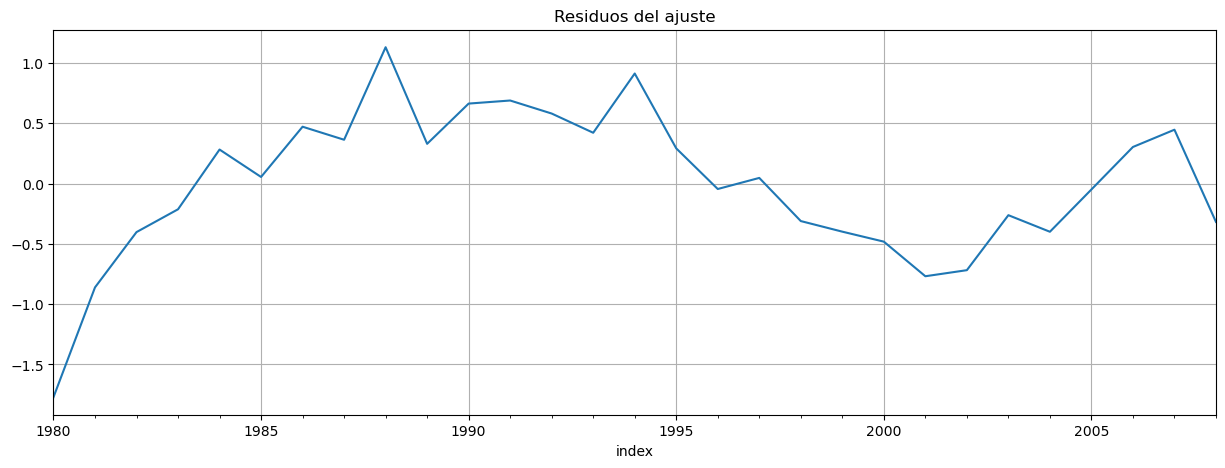

In [7]:
residuos = fit.resid
residuos.plot()
plt.title("Residuos del ajuste")

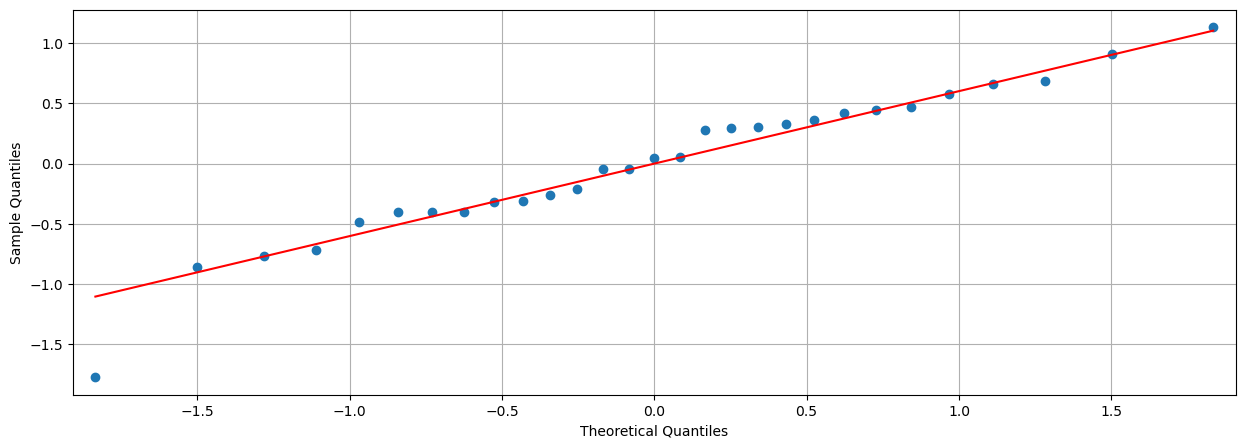

In [8]:
## QQ-plot es una verificación de gaussianidad.
sm.qqplot(residuos, line="s");

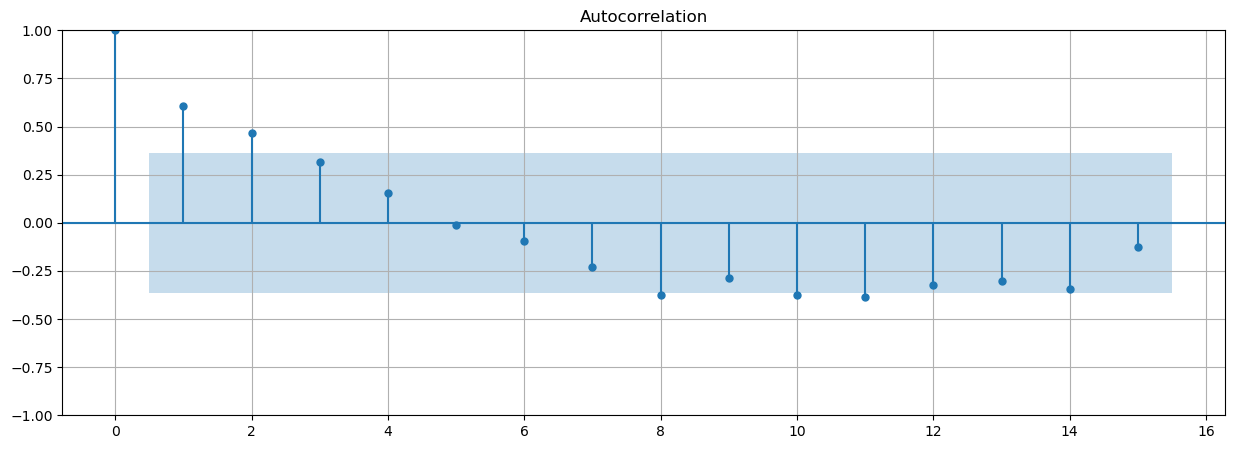

In [9]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuos, bartlett_confint=False);

Gráfico de los valores ajustados vs los valores reales:

Este gráfico nos muestra cómo de bien el modelo ajusta los datos reales.
Si los puntos azules (valores reales) están cerca de la línea ajustada (valores predichos), esto indica un buen ajuste.
Gráfico de los residuos:

Los residuos deben distribuirse aleatoriamente alrededor de cero.
Un patrón sistemático en los residuos puede indicar que el modelo no está capturando bien la estructura de los datos.
QQ-Plot de los residuos:

Este gráfico es una herramienta para evaluar la normalidad de los residuos.
Si los puntos se alinean aproximadamente a lo largo de la línea roja, los residuos son aproximadamente normales.
Desviaciones significativas de la línea indican que los residuos no son normales.
ACF de los residuos:

La función de autocorrelación de los residuos nos muestra si hay correlación entre los residuos en diferentes Lags.
Los residuos deben ser independientes, es decir, no deben mostrar autocorrelación significativa.
Análisis de los resultados:
Gráfico de valores ajustados:

Observando el primer gráfico, los valores reales (azul) y los valores ajustados (línea naranja) están bastante alineados. Esto sugiere que el modelo está capturando bien la tendencia general de los datos.
Gráfico de residuos:

En el segundo gráfico, los residuos parecen mostrar cierta estructura y no se distribuyen completamente de manera aleatoria alrededor de cero.
Esto sugiere que el modelo lineal puede no estar capturando toda la variabilidad en los datos.
QQ-Plot de los residuos:

El QQ-Plot muestra que los residuos siguen la línea teórica de una distribución normal bastante bien, aunque hay algunas desviaciones en los extremos.
Esto indica que, aunque los residuos son aproximadamente normales, hay algunas observaciones que se desvían de la normalidad.
ACF de los residuos:

El ACF muestra que hay autocorrelación significativa en los primeros Lags, lo cual es problemático.
La autocorrelación significativa indica que los residuos no son independientes, lo que sugiere que el modelo lineal no ha capturado toda la estructura temporal de los datos.
Conclusión:
Ajuste del modelo: Aunque el modelo lineal ajusta bien la tendencia general de los datos, los gráficos de residuos y la ACF sugieren que hay problemas con los residuos, indicando que el modelo podría mejorarse.
Normalidad de los residuos: Los residuos son aproximadamente normales, pero no completamente.
Independencia de los residuos: La autocorrelación en los residuos indica que el modelo no está capturando toda la dependencia temporal en los datos.
Recomendación: Dado que hay autocorrelación en los residuos, sería beneficioso considerar un modelo que pueda capturar mejor la estructura temporal, como un modelo ARIMA o un modelo de regresión con términos adicionales (por ejemplo, término cuadrático como se sugirió anteriormente).

5. Se propone agregar un término cuadrático (que corresponde a un decaimiento mayor a exponencial) a la regresión
anterior. Realice nuevamente el ajuste y compare con el anterior. ¿Cuál modelo le parece mejor?


Resumen del ajuste lineal:
                            OLS Regression Results                            
Dep. Variable:                 precio   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     1790.
Date:                Wed, 03 Jul 2024   Prob (F-statistic):           3.23e-26
Time:                        21:13:21   Log-Likelihood:                -26.396
No. Observations:                  29   AIC:                             56.79
Df Residuals:                      27   BIC:                             59.53
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.8914    

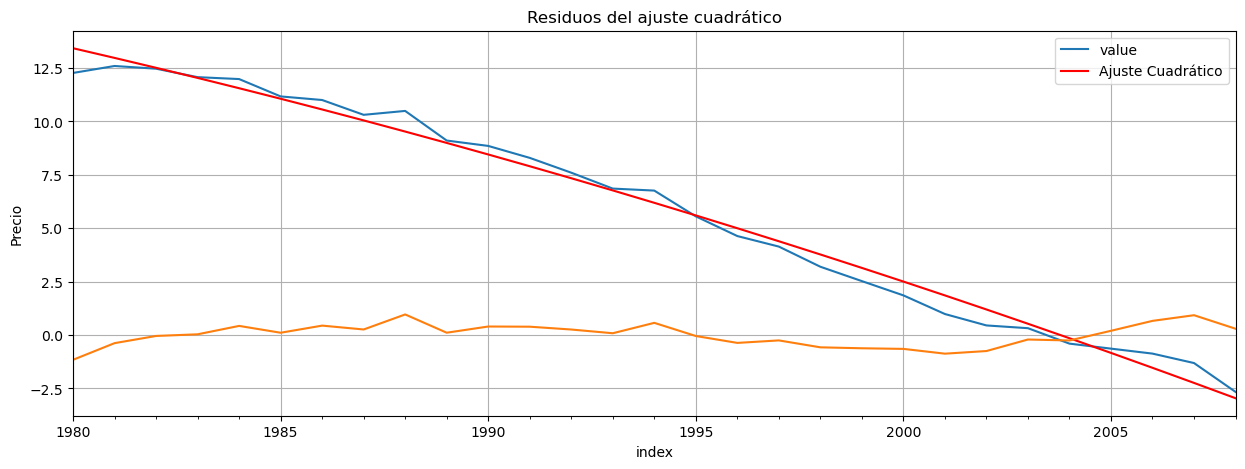

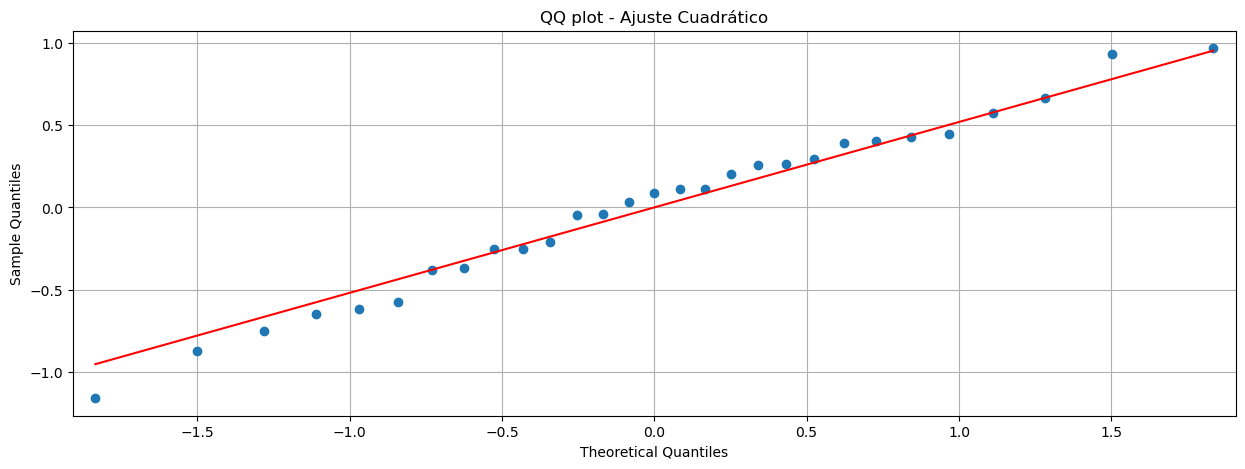

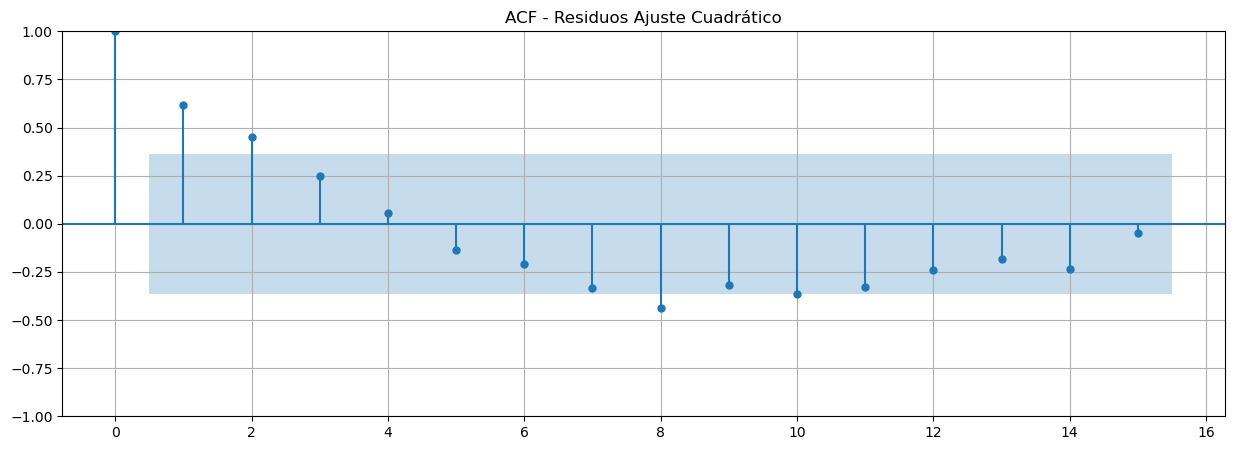

In [10]:
# Agregar el término cuadrático y realizar la regresión
time_squared = time ** 2
data_reg = pd.concat([time, time_squared, log_prices], axis=1)
data_reg.columns = ["time", "time_squared", "precio"]

# Ajuste con término cuadrático
fit_quadratic = ols(formula="precio ~ time + time_squared", data=data_reg).fit()

# Plot del ajuste cuadrático
ax = log_prices.plot(xlabel="Time", ylabel="Price deviation", legend=False)
ax.plot(fit_quadratic.fittedvalues, label="Ajuste Cuadrático", color='red')
plt.title("Desvios de Precio respecto al promedio - Ajuste Cuadrático")
plt.ylabel("Precio")
plt.xlabel("Año")
plt.legend()

# Residuos y QQ plot para el ajuste cuadrático
residuos_quadratic = fit_quadratic.resid
residuos_quadratic.plot()
plt.title("Residuos del ajuste cuadrático")
sm.qqplot(residuos_quadratic, line="s")
plt.title("QQ plot - Ajuste Cuadrático")

# ACF para los residuos del ajuste cuadrático
plot_acf(residuos_quadratic, bartlett_confint=False)
plt.title("ACF - Residuos Ajuste Cuadrático")

# Comparación de modelos
print("Resumen del ajuste lineal:")
print(fit.summary())
print("\nResumen del ajuste cuadrático:")
print(fit_quadratic.summary())


Comparar los dos modelos de regresión (lineal y cuadrático) requiere observar varias métricas y valores estadísticos de sus resultados para evaluar cuál modelo se ajusta mejor a los datos. A continuación, se analizan las métricas clave de ambos modelos:

1. R-squared y Adjusted R-squared:
Modelo Lineal:
R-squared: 0.985
Adjusted R-squared: 0.985
Modelo Cuadrático:
R-squared: 0.989
Adjusted R-squared: 0.988
El modelo cuadrático tiene un R-squared y un Adjusted R-squared ligeramente más altos, lo que sugiere que explica una mayor proporción de la variabilidad en la variable dependiente.

2. AIC (Akaike Information Criterion) y BIC (Bayesian Information Criterion):
Modelo Lineal:
AIC: 56.79
BIC: 59.53
Modelo Cuadrático:
AIC: 50.18
BIC: 54.29
El modelo cuadrático tiene valores de AIC y BIC más bajos, lo que indica un mejor balance entre ajuste y complejidad del modelo.

3. Significancia de los Coeficientes (P>|t|):
Modelo Lineal:
Intercepto: P>|t| = 0.000
Tiempo: P>|t| = 0.000
Modelo Cuadrático:
Intercepto: P>|t| = 0.000
Tiempo: P>|t| = 0.000
Tiempo^2: P>|t| = 0.006
Todos los coeficientes son significativos en ambos modelos (P < 0.05), pero en el modelo cuadrático, tanto el término lineal como el cuadrático son significativos.

4. Log-Likelihood:
Modelo Lineal:
Log-Likelihood: -26.396
Modelo Cuadrático:
Log-Likelihood: -22.092
El modelo cuadrático tiene un Log-Likelihood mayor, lo que indica un mejor ajuste.

*Pruebas Diagnósticas:*

5. Omnibus y Prob(Omnibus):
    Modelo Lineal: Omnibus = 4.198, Prob(Omnibus) = 0.123
    Modelo Cuadrático: Omnibus = 0.432, Prob(Omnibus) = 0.806

6. Durbin-Watson:
    Modelo Lineal: Durbin-Watson = 0.476
    Modelo Cuadrático: Durbin-Watson = 0.587

7. Jarque-Bera (JB) y Prob(JB):
    Modelo Lineal: JB = 2.584, Prob(JB) = 0.275
    Modelo Cuadrático: JB = 0.562, Prob(JB) = 0.755


El modelo cuadrático muestra mejores resultados en las pruebas de normalidad y autocorrelación de residuos, con valores de Prob(Omnibus) y Prob(JB) más altos (indicando residuos más normalmente distribuidos) y un Durbin-Watson más cercano a 2 (indicando menos autocorrelación).

Conclusión:
El modelo cuadrático parece ofrecer un mejor ajuste a los datos en comparación con el modelo lineal, como se evidencia por los valores más altos de R-squared y Adjusted R-squared, valores más bajos de AIC y BIC, mayor Log-Likelihood, y mejores resultados en las pruebas diagnósticas de residuos. Por lo tanto, es recomendable utilizar el modelo cuadrático para describir la relación entre las variables en este caso.










## Ejercicio 2

Se considera en primer lugar la serie `sales` de ventas de Oro en sudáfrica en el período Jul 1957 - Dic 1969. Se desea ajustar a dicha serie un modelo ARIMA adecuado.

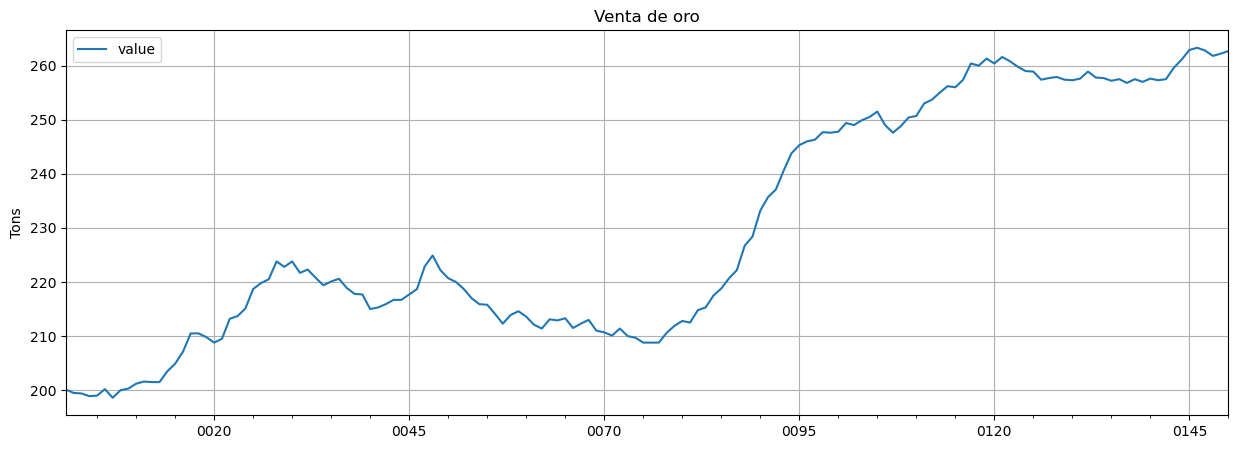

In [12]:
sales = astsa.sales
sales.plot()
plt.title("Venta de oro")
plt.ylabel("Tons");

Se pide:

   1. Analizar la serie anterior: ¿es estacionaria? ¿Presenta alguna tendencia clara?
   2. Analice la serie de incrementos de $y_t$. ¿Puede decir que es estacionaria? ¿Cuál es el incremento medio?
   3. Realice un análisis de autocorrelación de la serie diferenciada y elija dos modelos de tipo ARMA adecuados           para la misma.
   4. Ajuste los modelos anteriores a la serie original `sales` (no olvide incluir el orden de integración $I$). Compare los resultados obtenidos analizando los residuos y la calidad del ajuste.
   5. Elija el modelo que le parezca más adecuado y realice una predicción para el año 1970 incluyendo intervalos de confianza.

   1. Analizar la serie anterior: ¿es estacionaria? ¿Presenta alguna tendencia clara?

   Tendencia:
La serie temporal claramente muestra una tendencia creciente a lo largo del tiempo, lo que sugiere que no es estacionaria en su nivel original.


Indicadores de no-estacionariedad:
Tendencia: Una tendencia ascendente o descendente a lo largo del tiempo indica que la serie no es estacionaria.
Estacionalidad: Patrones periódicos que se repiten a intervalos regulares sugieren estacionalidad.
Varianza no constante: Cambios en la amplitud de las fluctuaciones a lo largo del tiempo también indican no-estacionariedad.



Observaciones del gráfico proporcionado:

Tendencia: Hay una tendencia general ascendente desde aproximadamente 1962 hasta 1970. También hay una tendencia ascendente desde 1957 hasta 1960, seguida de una tendencia descendente hasta 1962.

Estacionalidad: No se observan patrones estacionales claros en este gráfico.

Varianza: La varianza parece ser más o menos constante, pero la tendencia dominante es más significativa.

Conclusión:
El gráfico muestra una tendencia clara en varios periodos (ascendente desde 1962 y otra más corta desde 1957 a 1960). Esto sugiere que la serie no es estacionaria. En una serie estacionaria, esperarías ver fluctuaciones alrededor de una media constante sin una tendencia evidente.

   2. Analice la serie de incrementos de $y_t$. ¿Puede decir que es estacionaria? ¿Cuál es el incremento medio?

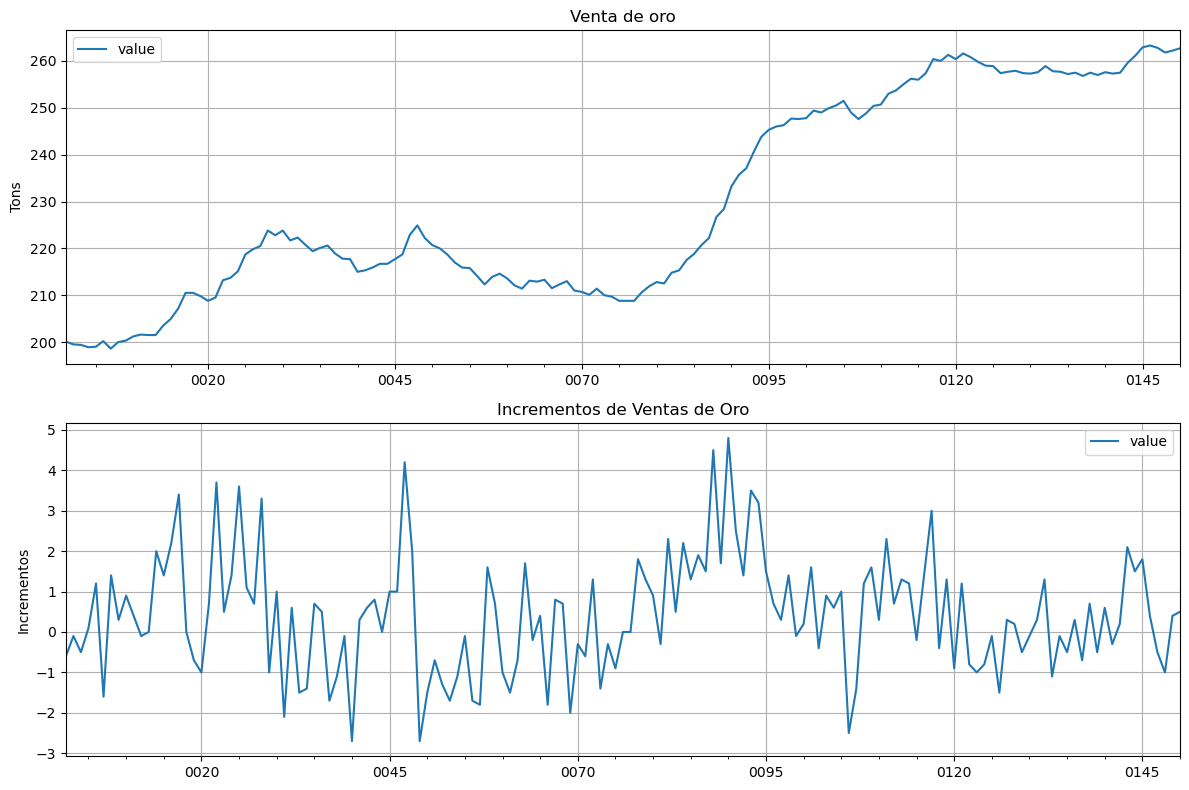

{'ADF Statistic': -3.722334218052501, 'p-value': 0.0038097483290768985, 'Used Lag': 3, 'Number of Observations': 145, 'Critical Values': {'1%': -3.476273058920005, '5%': -2.881687616548444, '10%': -2.5775132580261593}, 'Mean Increment': value    0.420134
dtype: float64}


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Calcular los incrementos
sales_diff = sales.diff().dropna()

# Realizar la prueba ADF en la serie de incrementos
adf_result_diff = adfuller(sales_diff)

# Calcular el incremento medio
mean_increment = sales_diff.mean()

# Visualizar la serie original y la serie de incrementos
fig, axes = plt.subplots(2, 1, figsize=(12, 8))
sales.plot(ax=axes[0], title='Venta de oro', ylabel='Tons')
sales_diff.plot(ax=axes[1], title='Incrementos de Ventas de Oro', ylabel='Incrementos')

plt.tight_layout()
plt.show()

# Obtener todos los valores de la prueba ADF
adf_stat_diff = adf_result_diff[0]
p_value_diff = adf_result_diff[1]
used_lag_diff = adf_result_diff[2]
n_obs_diff = adf_result_diff[3]
critical_values_diff = adf_result_diff[4]

# Mostrar los resultados de la prueba ADF y el incremento medio
adf_results = {
    "ADF Statistic": adf_stat_diff,
    "p-value": p_value_diff,
    "Used Lag": used_lag_diff,
    "Number of Observations": n_obs_diff,
    "Critical Values": critical_values_diff,
    "Mean Increment": mean_increment
}

print(adf_results)
